<h1><center>Relationship between Weather and Energy in NYC</center></h1>
<center>by Jacqueline Pelaez</center>
<center>June 2019</center>

# Overview 

## Table of Content
- Data Set
- Data Dictionary
- Problem Statement
- Hypothesis
- Analysis
    - Step 1: Understanding the data
    - Step 2: Analyze the data
    - Step 3: Further data analysis
- Conclusion
- Future Analysis


## Data Set

- 5 year historical weather data from weather.gov and electric load usage from NYISO
- Date range: 1/1/2014 to 12/31/2018
- Soruce: (Electric Load) https://www.nyiso.com; (Weather) https://www.weather.gov

## Data Dictionary (shortened version)

This data dictionary only includes the fields used for this analysis.

- Electric:
    - avg_load: Average electric load in MegaWatts 
- Weather:
    - temp_avg: Average of temp_max & temp_min in Fahrenheit
    - precip_wtr: Total precipitation in inches
    - precip_snw: Total snowfall in inches
    - sky_wx: Weather types observed (N/A)
    

## Problem Statement

What is the relationship between weather and energy usage in NYC?

## Hypothesis

I suspect to find a cyclical relationation between the weather and the energy usage. More specifically, I expect to see the following:

 - Spikes and drops in temperature lead to spikes and drops in energy use.
 - Different types of weather such as humidity and snow increase energy usgae. 

# Step 1: Understanding the data

1. Installing python packages for data manipulation and analysis.
2. Setting parameters for visuals and import data.
3. Exploring the data.

In [1]:
#1

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nbconvert

In [2]:
#2

#import modules needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#tell jupyter to display the data & visuals in the notebook
%matplotlib inline

#set the style of the plots/visuals
plt.style.use('ggplot')

#set size of plots and font sizse for asthetics
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#import data
df = pd.read_csv('Final_Weather_Electric_Load_NYC_2014_2018.csv')

In [3]:
#3

#viewing average load value by month per year in a pivot table
df.pivot_table(index=('month','year'),values=['avg_load'],aggfunc='mean').unstack()

avg_load                                                    
year          2014         2015         2016         2017         2018
month                                                                 
1      6092.456019  5976.367076  5775.826870  5740.597984  6077.548522
2      5925.564137  6239.194643  5782.372701  5612.537946  5647.707440
3      5697.902004  5721.014014  5387.224351  5661.264966  5575.757556
4      5312.782361  5245.698063  5289.404758  5234.385556  5274.729861
5      5438.807517  5713.097177  5564.256183  5420.221751  5627.025941
6      6510.875417  6481.962083  6562.426465  6598.500278  6348.390417
7      7203.606989  7466.156317  7731.897446  7305.221326  7527.950134
8      6750.527688  7457.961694  7960.697779  6885.796505  7837.409005
9      6378.545694  6831.698333  6692.642222  6296.589583  6537.424028
10     5448.650806  5346.528226  5427.137500  5647.911962  5552.796236
11     5476.964078  5331.785428  5370.561000  5376.416761  5445.875628
12     5686.580242  5445.561425  5721.725263  5767.739586  5562.109677

# Step 2: Analyze the data

1. Grouping average electric load by year and plotting data. (graph)
2. Creating copy of original data and flagging weather types. 
3. Adding seasons to data for additional analysis. 
4. Plotting load by season and weather type. (graph)
4. Scatter plot to visualize load and weather. (graph)

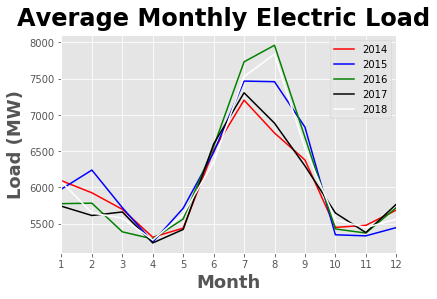

In [4]:
#1

#Displaying each month's load visually
ax = plt.gca()

#grouping each month together and taking the average by year
loadbymonth = df.groupby(['year', 'month'])['avg_load'].agg(['mean'])
#print(loadbymonth) # verify data - this displays the load by year and month

group_data = loadbymonth.reset_index()
#print(group_data) #verify data - this made the year and month a column ; makes index a column

#making each year one set of data points
Year_2014 = group_data[group_data.values == int('2014')]
Year_2015 = group_data[group_data.values == int('2015')]
Year_2016 = group_data[group_data.values == int('2016')]
Year_2017 = group_data[group_data.values == int('2017')]
Year_2018 = group_data[group_data.values == int('2018')]

#plotting each year on 1 line graph for comparison
Year_2014.plot(kind='line',x='month',y='mean',color='red', label='2014', ax=ax)
Year_2015.plot(kind='line',x='month',y='mean',color='blue', label='2015', ax=ax)
Year_2016.plot(kind='line',x='month',y='mean',color='green', label='2016', ax=ax)
Year_2017.plot(kind='line',x='month',y='mean',color='black', label='2017', ax=ax)
Year_2018.plot(kind='line',x='month',y='mean',color='white', label='2018', ax=ax)

plt.xticks(range(1,13))
plt.xlabel('Month', fontweight='bold',fontsize=18)
plt.ylabel('Load (MW)', fontweight='bold',fontsize=18)
#plt.title('Month')
plt.suptitle('Average Monthly Electric Load', fontweight='bold',fontsize=24)

plt.show()



In [5]:
#2

#make a copy of the dataframe
df_copy = df.copy()

#set date to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'])

#create a new column in copy df with true / false values
#replace certain values in sky_wx column with diff. name as per data dictionary
df_copy['rain'] = df_copy['precip_wtr'] > 0
df_copy['snow'] = df_copy['precip_snw'] > 0
df_copy['windy'] = df_copy['wind_avgspd'] > 15
df_copy['sky_wx'].replace(float(1),'Fog', inplace=True)
df_copy['fog'] = df_copy['sky_wx'] == 'Fog'
df_copy['sky_wx'].replace(float(8),'Smoke or haze', inplace=True)
df_copy['haze'] = df_copy['sky_wx'] == 'Smoke or haze'
df_copy['sky_wx'].replace(float(3),'Thunder', inplace=True)
df_copy['thunder'] = df_copy['sky_wx'] == 'Thunder'
df_copy['sky_wx'].replace(float(5),'Hail', inplace=True)
df_copy['hail'] = df_copy['sky_wx'] == 'Hail'

df_copy['rain'].fillna(0, inplace=True)
df_copy['snow'].fillna(0, inplace=True)
df_copy['windy'].fillna(0, inplace=True)
df_copy['fog'].fillna(0, inplace=True)
df_copy['haze'].fillna(0, inplace=True)
df_copy['thunder'].fillna(0, inplace=True)
df_copy['hail'].fillna(0, inplace=True)

In [6]:
#3

#Add column seasons to df_copy
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)

seasons = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

df_copy['season'] = df_copy.date.apply(get_season)

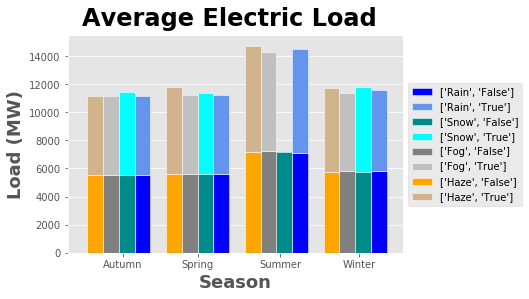

In [7]:
#4

#Visually graph season electric load by weather type
ax = plt.gca()

w = .2

#create data tables for season and weather type
sea_rain = df_copy.groupby(['season','rain'])['avg_load'].agg(['mean']).unstack()
sea_snow = df_copy.groupby(['season','snow'])['avg_load'].agg(['mean']).unstack()
sea_fog = df_copy.groupby(['season','fog'])['avg_load'].agg(['mean']).unstack()
sea_haze = df_copy.groupby(['season','haze'])['avg_load'].agg(['mean']).unstack()

#visually graph weather type on same bar graph
rain = df_copy.groupby(['season','rain'])['avg_load'].agg(['mean']).unstack().plot(kind='bar', stacked=True, label='rain', color=['blue', 'cornflowerblue'], ax=ax, width=w, position=2, edgecolor='white', rot=0, align='center')
snow = df_copy.groupby(['season','snow'])['avg_load'].agg(['mean']).unstack().plot(kind='bar', stacked=True, label='snow', color=['darkcyan', 'aqua'], ax=ax, width=w,position=3, edgecolor='white', rot=0, align='center')
fog = df_copy.groupby(['season','fog'])['avg_load'].agg(['mean']).unstack().plot(kind='bar', stacked=True, label='fog', color=['grey', 'silver'], ax=ax, width=w, position=4, edgecolor='white', rot=0, align='center')
haze = df_copy.groupby(['season','haze'])['avg_load'].agg(['mean']).unstack().plot(kind='bar', stacked=True, label='haze', color=['orange', 'tan'], ax=ax, width=w,position=5, edgecolor='white', rot=0, align='center')

#plotting different legends and x / y values
ax.grid(False)
plt.xlabel('Season', fontweight='bold',fontsize=18)
plt.ylabel('Load (MW)', fontweight='bold', fontsize=18)
ax.set_xticks([])
ax.yaxis.grid(True)
plt.suptitle('Average Electric Load', fontweight='bold',fontsize=24)
#plt.title('Season and Weather Type')
plt.xticks((-.55,.4,1.45,2.45), ('Autumn','Spring','Summer','Winter'))
ax.legend([["Rain", "False"],["Rain", "True"],["Snow", "False"],["Snow", "True"],["Fog", "False"],["Fog", "True"],["Haze", "False"],["Haze", "True"]], loc='center left', bbox_to_anchor=(1.0, 0.5));


plt.show()

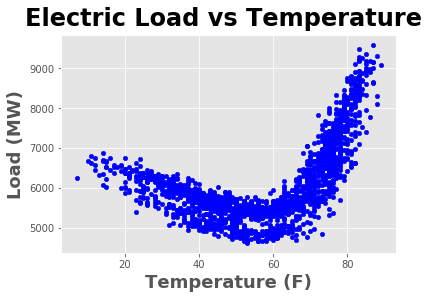

In [8]:
#5

# a scatter plot comparing temp. and load
df.plot(kind='scatter',x='temp_avg',y='avg_load',color='blue')

#x / y labels and title 
plt.xlabel('Temperature (F)', fontweight='bold',fontsize=18)
plt.ylabel('Load (MW)', fontweight='bold', fontsize=18)
plt.suptitle('Electric Load vs Temperature', fontweight='bold',fontsize=24)

plt.show()

# Step 3: Further data analysis

1. Install and import different package for visualization. 
    1. Using boxplot to display relationship between weather and usage. (graph)
3. Creating a copy of original data set to add weekday analysis. 
4. Plotting electric load by weekday to see relationship. (graph)
5. Analyzing daily, weekly, and rolling trends. (graph)
6. Plotting yearly trend. (graph)

In [9]:
#1

!pip install seaborn

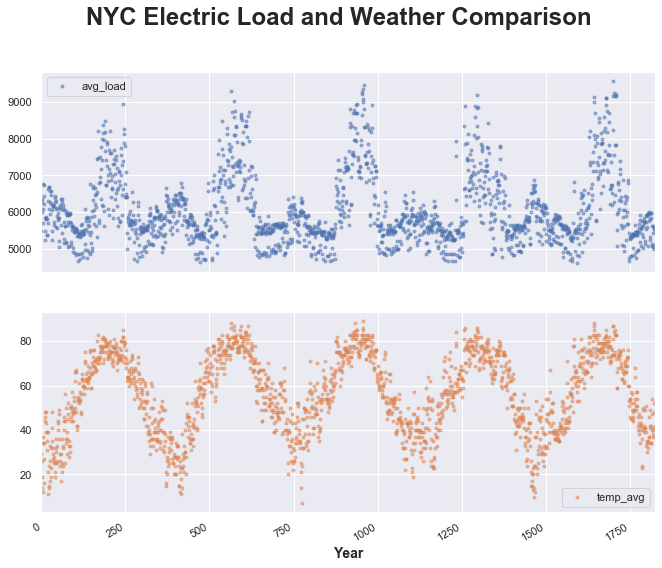

In [10]:
#1A

import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

#comparing load and year
cols_plot = ['avg_load', 'temp_avg']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

for ax in axes:
  ax.set_xlabel('Year', fontweight='bold',fontsize=14)
  plt.suptitle('NYC Electric Load and Weather Comparison', fontweight='bold',fontsize=24)

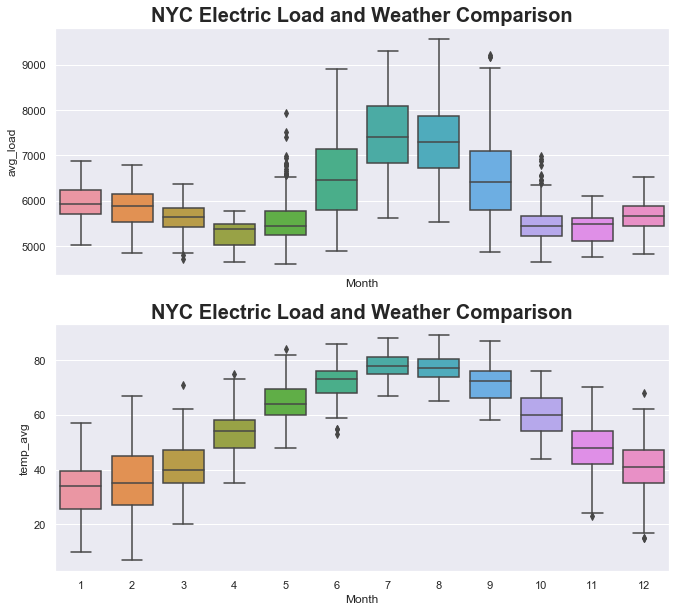

In [11]:
#2

#Visualizing data with boxplot to group the data by different time periods and display the 
#distributions for each group. Grouping by month to vizualize 1 year

fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['avg_load', 'temp_avg'], axes):

  sns.boxplot(data=df, x='month', y=name, ax=ax)

  #ax.set_ylabel('Load MW')

  ax.set_title('NYC Electric Load and Weather Comparison', fontweight='bold',fontsize=20)
  ax.set_xlabel('Month',fontsize=12)
  

# Remove the automatic x-axis label from all but the bottom subplot

if ax != axes[-1]:

  ax.set_xlabel('')

In [12]:
#3

#make a different copy
df_copy_2 = df.copy()

#setting datetime for date column
df_copy_2['date'] = pd.to_datetime(df_copy_2['date'])

df_copy_2 = df_copy_2.set_index('date')

df_copy_2['Weekday Name'] = df_copy_2.index.weekday_name #adding new column for weekday

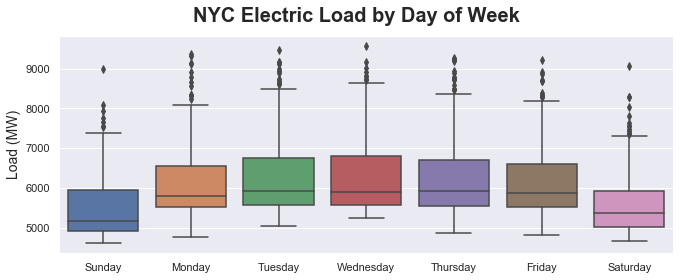

In [13]:
#grouping by day of week
sns.boxplot(data=df_copy_2, x='Weekday Name', y='avg_load', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])

plt.ylabel('Load (MW)', fontsize=14)
plt.xlabel('', fontsize=14)
plt.suptitle('NYC Electric Load by Day of Week', fontweight='bold',fontsize=20)

plt.show()

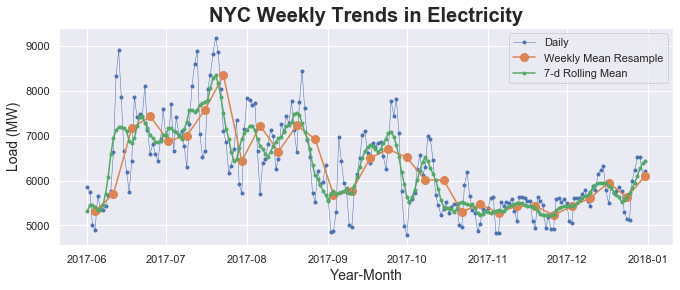

In [14]:
#5

#Comparing rolling mean, resample, and daily data

data_columns = ['avg_load', 'temp_avg'] # Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)

# Compute the centered 7-day rolling mean
load_7d = df_copy_2[data_columns].rolling(7, center=True).mean()

# Compute resample from daily to weekly
load_mean = df_copy_2[data_columns].resample('W').mean()

# Start and end of the date range to extract
start, end = '2017-06', '2017-12'

# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(df_copy_2.loc[start:end, 'avg_load'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(load_mean.loc[start:end, 'avg_load'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(load_7d.loc[start:end, 'avg_load'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Load (MW)', fontsize=14)
ax.set_xlabel('Year-Month', fontsize=14)
ax.set_title('NYC Weekly Trends in Electricity',fontweight='bold',fontsize=20);
ax.legend();

#We can see that the weekly mean time series is smoother than the daily 
#time series because higher frequency variability has been averaged out in the resampling.

#We can also see that the 7 day rolling mean data points have the same spacing as the daily data, 
#but the curve is smoother because higher frequency variability has been averaged out. 

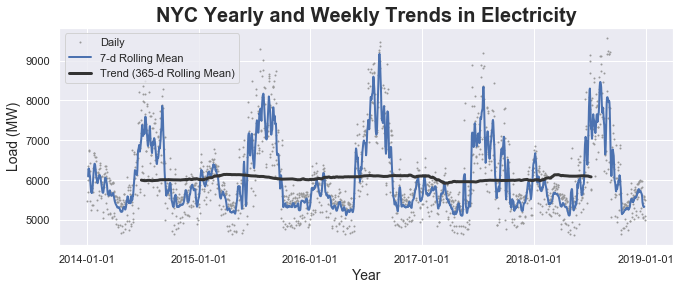

In [15]:
#6

import matplotlib.dates as mdates

#Yearly rolling mean
load_365d = df_copy_2[data_columns].rolling(window=365, center=True, min_periods=360).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df_copy_2['avg_load'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(load_7d['avg_load'], linewidth=2, label='7-d Rolling Mean')
ax.plot(load_365d['avg_load'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Load (MW)', fontsize=14)
ax.set_title('NYC Yearly and Weekly Trends in Electricity',fontweight='bold',fontsize=20);

#Yearly rolling mean shows that the long-term trend in electricity usage is pretty flat
#Weekly, the usage seems to vary more due to day of week as we saw in the early graph

## Conclusion 

As a result, accourding to the data, my hypothesis turned out to be partially true. I suspected to find a cyclical relationation between the weather and the energy usage. I updated my original hypothesis according what the data reflects. 

 - TRUE: Spikes and drops in temperature lead to spikes and drops in energy use.
     - The analysis shows a seasonal usage trend durring the summer and a drop durring the winter. 
 - FALSE: Different types of weather such as humidity and snow increase energy usgae. 
     - Based on the data, the type of weather doesn't have much impact on the energy usage. 
     
## Future Analysis

I would like to identify what other factors impact electric usage in NYC aside from weather in order to incorporate it into the analysis. For example:

- Has solar energy impacted electric load usage in NYC?
- Is there a correlation between residential and commerical developments in NYC and electric usage?
- Considering the different elements impacting usage, can I predict future load based on historical usage?


In [1]:
#make notebook into slideshow
#jupyter nbconvert NYC_Weather_Energy.ipynb --to slides --post serve